In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import cupy as cp
import cv2
from matplotlib import pyplot as plt 
import numpy as np
import sklearn
import math
import random
circle = cv2.imread('circle.jpg')
row = circle.shape[0]
column = circle.shape[1]
point = []
inlier = -1
Grange = [1,50]
pBarLength = 70
K = 0

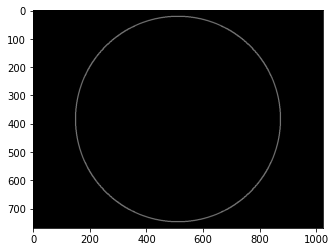

In [2]:
circle = cv2.Canny(circle,50,100)
plt.imshow(circle,cmap = 'gray')
point = []
for i in range(row):
    for j in range(column):
        if circle[i,j] == 255:
            point.append([i,j])

In [3]:
def ThreePoint(img):
    x1 = 0
    x2 = 0
    val = random.sample(point,3)
    y1 = 0
    y2 = 0
    while abs(x1 <= 1) or abs(x2 <= 1) or abs(y1 <= 1) or abs(y2 <= 1)  :
        val = random.sample(point,3)
        x1 = (val[0][0] - val[1][0]) 
        y1 = (val[0][1] - val[1][1]) 
        x2 = (val[1][0] - val[2][0]) 
        y2 = (val[1][1] - val[2][1])
            
    return val

def Bisector(val):
    x1 = (val[0][0] - val[1][0]) 
    y1 = (val[0][1] - val[1][1]) 
    x2 = (val[1][0] - val[2][0]) 
    y2 = (val[1][1] - val[2][1])
    midx1 = ((val[0][0]) + (val[1][0]))/ 2 
    midy1 = ((val[0][1]) + (val[1][1]))/ 2
    midx2 = ((val[1][0]) + (val[2][0]))/ 2
    midy2 = ((val[1][1]) + (val[2][1]))/ 2
    midp1 = [midx1, midy1]
    midp2 = [midx2, midy2]
    slope1 = y1/x1
    slope1 = -(1/slope1)
    slope2 = y2/x2
    slope2 = -(1/slope2)
    b1 = (midp1[1] - slope1 * midp1[0])
    b2 = (midp2[1] - slope2 * midp2[0])
    a = cp.array([[slope1,-1], [slope2, -1]])
    b = cp.array([-b1,-b2])
    x = cp.linalg.solve(a, b)
    return x


def Radius(center,point):
    val = random.sample(point,1)
    return math.sqrt(math.pow((val[0][0]-center[0]),2)+math.pow((val[0][1]-center[1]),2))

(511, 383)
363


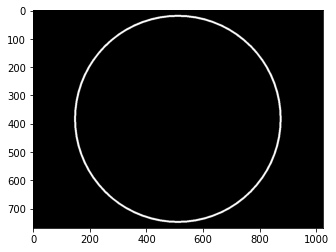

In [4]:
for z in range(0,1):
    center = ThreePoint(circle)
    center = Bisector(center)
    r = int(Radius(center,point))
    center = (int(center[1]),int(center[0]))
    print(center)
    print(r)
image1 = cv2.circle(circle, (center), r, (255,0,0), 5)
plt.imshow(image1,cmap = 'gray')

In [5]:
RANpoint = []
for i in range(row):
    for j in range(column):
            RANpoint.append([i,j])
            
            
def ThreeRandomPoint(RANpoint):
    #val = random.sample(RANpoint,3)
    x1 = 0
    y1 = 0
    x2 = 0
    y2 = 0
    while abs(x1 == 0) or abs(x2 == 0) or abs(y1 == 0) or abs(y2 == 0):# or abs((x1-x2) <=) or abs((y1-y2)<=250) :
        val = random.sample(RANpoint,3)
        x1 = (val[0][0] - val[1][0]) 
        y1 = (val[0][1] - val[1][1]) 
        x2 = (val[1][0] - val[2][0]) 
        y2 = (val[1][1] - val[2][1])
        #s1 = y1/x1
        #slope1 = -(1/s1)
        #s2 = y2/x2
        #slope2 = -(1/s2)
    return val 

def RANlist(circle1,row,column):
    whitep = []
    for i in range(row):
        for j in range(column):
            if circle1[i,j] == 255:
                whitep.append([i,j])
    #plt.imshow(circle1,cmap = 'gray')
    return whitep
   
def Inliercal(whitep,point):
    inlier = 0
    inlier = len([x for x in whitep if x in point])
    return inlier

def Inlierpoint(whitep,point):
    inlier = 0
    inlier = [x for x in whitep if x in point]
    return inlier

█░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░0% For iteration =1 1 30
███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░10% For iteration =6 6 44
█████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░12% For iteration =7 7 69
██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░14% For iteration =8 8 146
███████████████████████████████████████████████████░░░░░░░░░░░░░░░░░░░73% For iteration =37 37 423
██████████████████████████████████████████████████████████████████████100% For iteration =50 423
(560, 482)
[[650, 779], [243, 696], [396, 299]]


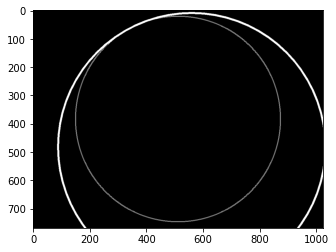

In [6]:
inlier = -1
k = 0
Centerbest = center
for i in range(Grange[0],Grange[1]+1):
    imgini = np.zeros((row,column),dtype = np.uint8)
    pval = ThreeRandomPoint(RANpoint)
    center = Bisector(pval)
    center = (int(center[1]),int(center[0]))
    r = int(Radius(center,point))
    circle1 = cv2.circle(imgini, (center), r, (255,0,0), 5)
    whitep = RANlist(circle1,row,column)
    k = Inliercal(whitep,point)
    pctge = (i - Grange[0]) / (Grange[1] - Grange[0])
    temp = int(round(pBarLength * pctge))
    print("\r"+(temp-1)*'█'+'█'+(pBarLength-temp)*'░'+str(round(pctge*100))+'%'+" For iteration ="+str(i),end=' ')
    if inlier < k: 
        inlier = k
        Radiusbest = r
        bestval = pval
        if center[0]<= 0 or center[1]<=0:
             Centerbest = Centerbest
        else:
            Centerbest = center
            print(i,inlier)
    if inlier >= 3000:
        break

print(inlier)
circle = cv2.imread('circle.jpg')
circle = cv2.Canny(circle,50,100)
circlebest = cv2.circle(circle, (Centerbest), Radiusbest, (255,0,0), 5)
plt.imshow(circlebest,cmap = 'gray')
print(Centerbest)
print(bestval)

[[144  92  49]]


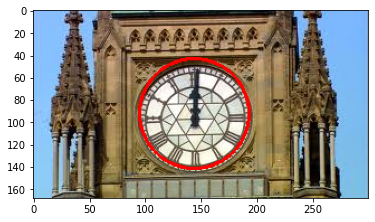

In [33]:
image = cv2.imread('parliament_clock.jpg')
output = image.copy()
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT,1,40)
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    print(circles)
    for (x, y, r) in circles:
        cv2.circle(output, (x, y), r, (0, 0, 255), 2)
plt.imshow(cv2.cvtColor(output,cv2.COLOR_BGR2RGB))

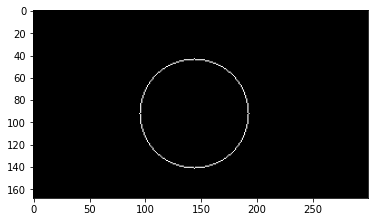

In [34]:
clock = cv2.imread('parliament_clock.jpg')
clockrow = clock.shape[0]
clockcolumn = clock.shape[1]
background = np.zeros((clockrow,clockcolumn),dtype = np.uint8)
clockimg = cv2.circle(background, (x, y), r, (255, 0, 0), 0)
clocklist = RANlist(clockimg,clockrow,clockcolumn)
plt.imshow(clockimg,cmap = 'gray')

def RANclockpoint(clock_row,clock_column):
    RANclockpoint = []
    for i in range(clock_row):
        for j in range(clock_column):
            RANclockpoint.append([i,j])
    return RANclockpoint

    

In [26]:
def findinlier():
    K = 0
    while K <15:
        image = cv2.imread('parliament_clock.jpg')
        output = image.copy()
        img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT,1,40)
        if circles is not None:
            circles = np.round(circles[0, :]).astype("int")
            for (x, y, r) in circles:
                clockimg = cv2.circle(output, (x, y), r, (0, 0, 255), 2)
        background = np.zeros((clockrow,clockcolumn),dtype = np.uint8)
        clockimg = cv2.circle(background, (x, y), r, (255, 0, 0), 0)
        background2 = np.zeros((clockrow,clockcolumn),dtype = np.uint8)
        Randomclockpoint = RANclockpoint(clockrow,clockcolumn)
        cval = ThreeRandomPoint(Randomclockpoint)
        clockcenter = Bisector(cval)
        clockcenter = (int(clockcenter[1]),int(clockcenter[0]))
        clock_r = int(Radius(clockcenter,clocklist))
        RANclockimg = cv2.circle(background2,clockcenter, clock_r, (255, 0, 0), 0)
        RANclockimg1 = cv2.circle(clockimg,clockcenter, clock_r, (255, 0, 0), 1)
        plt.imshow(RANclockimg1,cmap = 'gray')
        RANclocklist = RANlist(RANclockimg,clockrow,clockcolumn)
        K = Inliercal(RANclocklist,clocklist)
    cp = Inlierpoint(RANclocklist,clocklist)
    print(K)
    return cp

def goodpoints(inlierp):
    pval = ThreeRandomPoint(inlierp)
    center = Bisector(pval)
    while center[1] == -math.inf or center[0] == -math.inf or center[1] == math.inf or center[0] == math.inf:
        center = Bisector(pval)
    center = (int(center[1]),int(center[0]))
    return center

16
[[100, 192], [101, 192], [103, 191], [104, 191], [105, 191], [106, 190], [107, 190], [109, 189], [110, 189], [112, 188], [114, 187], [116, 186], [118, 185], [119, 184], [120, 184], [121, 183]]


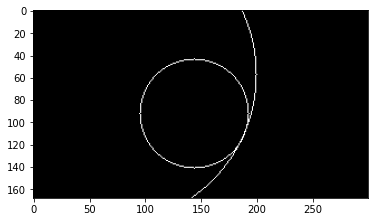

In [63]:
aa = findinlier()
print(aa)

[[338, 526], [90, 356], [342, 525]] (145, 97) 53 24


Text(0.5, 1.0, 'Detected Intersection Image')

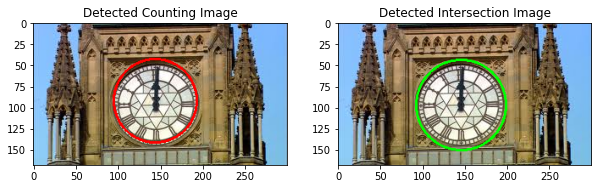

In [65]:
while K < 10:
    center = goodpoints(aa)
    background3 = np.zeros((clockrow,clockcolumn),dtype = np.uint8)
    r = int(Radius(center,clocklist))
    circle1 = cv2.circle(background3, (center), r, (255,0,0), 1)
    RANclocklist = RANlist(circle1,clockrow,clockcolumn)
    K = Inliercal(RANclocklist,clocklist)
background = np.zeros((clockrow,clockcolumn),dtype = np.uint8)
image = cv2.imread('parliament_clock.jpg')
circle2 = cv2.circle(image, (center), r, (0,255,0), 2)
#plt.imshow(cv2.cvtColor(circle2,cv2.COLOR_BGR2RGB))
print(pval,center,r,K)
plt.figure(figsize=(10,3))
plt.subplot(1,2,1),plt.imshow(cv2.cvtColor(output,cv2.COLOR_BGR2RGB))
plt.title('Detected Counting Image')
plt.subplot(1,2,2),plt.imshow(cv2.cvtColor(circle2,cv2.COLOR_BGR2RGB))
plt.title('Detected Intersection Image')